In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import datetime

In [2]:
data=pd.read_excel("C:\\Users\\Administrator\\Downloads\\service-data.xlsx")
data.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [3]:
data.shape

(28484, 7)

In [4]:
data.isnull().sum()

Invoice Date              2
Job Card Date             2
Business Partner Name     0
Vehicle No.               0
Vehicle Model             2
Current KM Reading        2
INVOICE LINE TEXT        35
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(28448, 7)

In [7]:
data.isnull().sum()

Invoice Date             0
Job Card Date            0
Business Partner Name    0
Vehicle No.              0
Vehicle Model            0
Current KM Reading       0
INVOICE LINE TEXT        0
dtype: int64

In [8]:
data.columns

Index(['Invoice Date', 'Job Card Date', 'Business Partner Name', 'Vehicle No.',
       'Vehicle Model', 'Current KM Reading', 'INVOICE LINE TEXT'],
      dtype='object')

In [9]:
col=['Invoice_Date', 'Job_Card_Date', 'Business_Partner_Name', 'Vehicle_No',
       'Vehicle_Model', 'Current_KM_Reading', 'INVOICE_LINE_TEXT']

In [10]:
data.columns=col
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [11]:
data.loc[data.INVOICE_LINE_TEXT!=0,"demand"]=1
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,demand
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0


In [12]:
data=data.loc[:,['Job_Card_Date',"Vehicle_Model","INVOICE_LINE_TEXT","demand"]]
data.head()

,Job_Card_Date,Vehicle_Model,INVOICE_LINE_TEXT,demand
0,2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL,1.0
1,2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL,1.0
2,2017-05-31,BAJAJ PULSAR NS 200,POLISH,1.0
3,2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES,1.0
4,2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL,1.0


In [13]:
data['Pandas_Datestamp'] = pd.to_datetime(data['Job_Card_Date'], infer_datetime_format=True)
data['Year'] = pd.DatetimeIndex(data['Job_Card_Date']).year
data['Month'] = pd.DatetimeIndex(data['Job_Card_Date']).month
data.sort_values(by='Pandas_Datestamp')

,Job_Card_Date,Vehicle_Model,INVOICE_LINE_TEXT,demand,Pandas_Datestamp,Year,Month
0,2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL,1.0,2017-05-30,2017,5
23,2017-05-31,BAJAJ PULSAR 220,VALVE GRAINDING,1.0,2017-05-31,2017,5
24,2017-05-31,BAJAJ PULSAR 220,DISC PAD,1.0,2017-05-31,2017,5
25,2017-05-31,BAJAJ PULSAR 220,LOADING GEAR,1.0,2017-05-31,2017,5
26,2017-05-31,BAJAJ PULSAR 220,PACKING KIT,1.0,2017-05-31,2017,5
...,...,...,...,...,...,...,...
28455,2019-01-06,BAJAJ PULSAR 150,CHAIN LUBRICATION,1.0,2019-01-06,2019,1
28454,2019-01-06,BAJAJ PULSAR 150,ENGINE OIL,1.0,2019-01-06,2019,1
28480,2019-01-06,BAJAJ DISCOVER 125,DISC OIL,1.0,2019-01-06,2019,1
28466,2019-01-06,BAJAJ PULSAR NS 160,POLISH,1.0,2019-01-06,2019,1


In [14]:
data_pulser150=data[(data['Vehicle_Model'].astype(str).str.contains('BAJAJ PULSAR 150'))&(data["INVOICE_LINE_TEXT"]=='ENGINE OIL')]
data_pulser150

,Job_Card_Date,Vehicle_Model,INVOICE_LINE_TEXT,demand,Pandas_Datestamp,Year,Month
14,2017-05-31,BAJAJ PULSAR 150,ENGINE OIL,1.0,2017-05-31,2017,5
50,2017-06-01,BAJAJ PULSAR 150,ENGINE OIL,1.0,2017-06-01,2017,6
58,2017-06-01,BAJAJ PULSAR 150,ENGINE OIL,1.0,2017-06-01,2017,6
100,2017-06-02,BAJAJ PULSAR 150,ENGINE OIL,1.0,2017-06-02,2017,6
117,2017-06-03,BAJAJ PULSAR 150,ENGINE OIL,1.0,2017-06-03,2017,6
...,...,...,...,...,...,...,...
28428,2019-01-05,BAJAJ PULSAR 150,ENGINE OIL,1.0,2019-01-05,2019,1
28432,2019-01-05,BAJAJ PULSAR 150,ENGINE OIL,1.0,2019-01-05,2019,1
28443,2019-01-05,BAJAJ PULSAR 150,ENGINE OIL,1.0,2019-01-05,2019,1
28454,2019-01-06,BAJAJ PULSAR 150,ENGINE OIL,1.0,2019-01-06,2019,1


In [19]:
data4=data_pulser150.loc[:,["Pandas_Datestamp",'demand']]
print(data4.shape)
data4.head()

(1066, 2)


,Pandas_Datestamp,demand
14,2017-05-31,1.0
50,2017-06-01,1.0
58,2017-06-01,1.0
100,2017-06-02,1.0
117,2017-06-03,1.0


In [20]:
data5=data4.groupby(data4.Pandas_Datestamp).sum()
data5

,demand
Pandas_Datestamp,
2017-05-31,1.0
2017-06-01,2.0
2017-06-02,1.0
2017-06-03,2.0
2017-06-05,4.0
...,...
2019-01-02,2.0
2019-01-03,1.0
2019-01-04,1.0


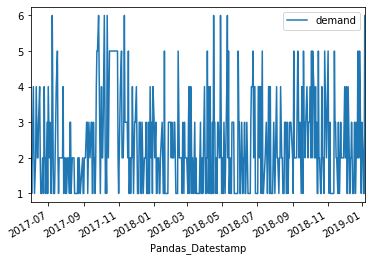

In [21]:
data5.plot()

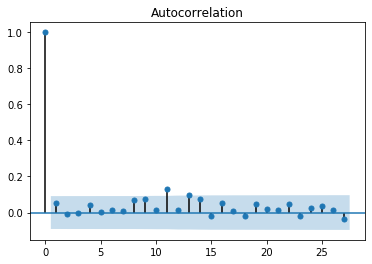

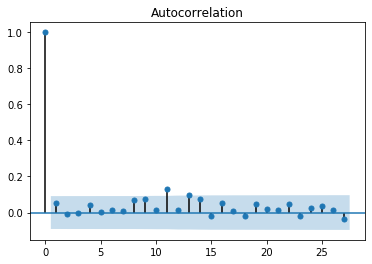

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data5)

In [23]:
data5_diff=data5.diff(periods=1)

In [24]:
data5_diff=data5_diff[1:]
data5_diff.head(2)

,demand
Pandas_Datestamp,
2017-06-01,1.0
2017-06-02,-1.0


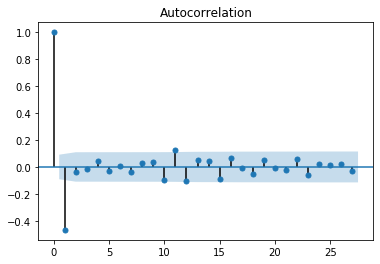

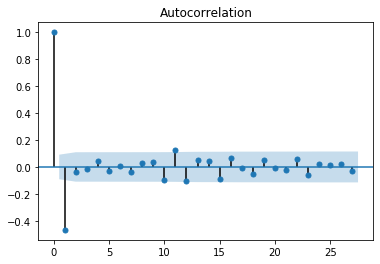

In [25]:
plot_acf(data5_diff)

In [26]:
X=data5.values
train=X[0:400]
test=X[400:]
prediction=[]

In [27]:
from  statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [28]:
predictions=model_ar_fit.predict(start=400,end=500)

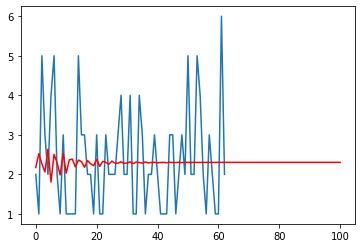

In [29]:
plt.plot(test)
plt.plot(predictions,color='red')
